In [1]:
import Prepare
import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train, validate, test = Prepare.prepare_zillow()

train shape:  (44284, 26) , validate shape:  (12491, 26) , test shape:  (6309, 26)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


In [3]:
train

,index_id,parcel_id,log_error,tax_value,structure_tax_value,land_tax_value,tax_amount,tax_rate,county_id,zip_code,...,bed_plus_bath,room_count,property_sqft,lot_sqft,land_use_code,land_use_type,year_built,property_age,transaction_date,transaction_month
35177,39113,12881510,-0.080165,114424.0,52011.0,62413.0,1624.52,1.419737,6037.0,96507.0,...,4.0,0.0,1198.0,4384.0,0100,261.0,1920.0,100.0,2017-05-23,05
35637,39623,13011235,-0.021597,384934.0,123859.0,261075.0,4930.30,1.280817,6037.0,96510.0,...,5.0,0.0,1176.0,6055.0,0100,261.0,1948.0,72.0,2017-05-25,05
51671,57129,14383819,0.030354,228441.0,67437.0,161004.0,2372.52,1.038570,6059.0,96974.0,...,5.0,6.0,1240.0,2351.0,122,261.0,1971.0,49.0,2017-07-14,07
7403,8500,12671725,-0.034023,555000.0,185000.0,370000.0,6317.81,1.138344,6037.0,96161.0,...,5.0,0.0,1399.0,139956.0,010C,266.0,1989.0,31.0,2017-02-08,02
64398,71263,14177524,-0.014118,252042.0,71195.0,180847.0,3291.68,1.306005,6059.0,97068.0,...,5.0,6.0,1477.0,7260.0,122,261.0,1955.0,65.0,2017-08-29,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59414,65729,12098710,0.051275,255815.0,68380.0,187435.0,3096.76,1.210547,6037.0,96023.0,...,4.0,0.0,1296.0,5534.0,0100,261.0,1905.0,115.0,2017-08-11,08
7202,8265,12610149,-0.062435,166053.0,111607.0,54446.0,2107.26,1.269029,6037.0,96159.0,...,6.0,0.0,2164.0,10180.0,0100,261.0,1974.0,46.0,2017-02-07,02
59195,65487,12036360,-0.161191,912709.0,206095.0,706614.0,9264.17,1.015019,6037.0,96008.0,...,4.0,0.0,1350.0,5554.0,0100,261.0,1922.0,98.0,2017-08-10,08
5333,6065,12071950,-0.024243,154774.0,112761.0,42013.0,1761.06,1.137827,6037.0,96326.0,...,6.0,0.0,2267.0,8993.0,0100,261.0,1966.0,54.0,2017-01-27,01


In [4]:
# first split into X variables and y target
X_train = train.drop('log_error',axis=1)
y_train = train[['log_error']]

X_validate = validate.drop('log_error',axis=1)
y_validate = validate[['log_error']]

X_test = test.drop('log_error',axis=1)
y_test = test[['log_error']]

In [5]:
print('Log Error Stats\n')
print('average:', train.log_error.mean(),'\n')
print('mode:', train.log_error.mode()[0],'\n')
print('median:', train.log_error.median(),'\n')

Log Error Stats

average: 0.01623595303835073 

mode: 0.00265187150207 

median: 0.006570924980950001 



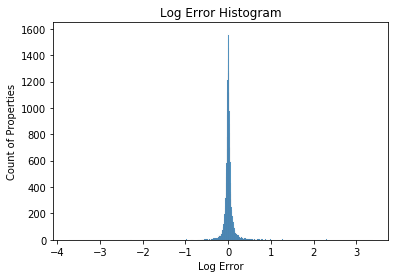

In [6]:
# distribution of log error
plt.title('Log Error Histogram')
plt.xlabel('Log Error')
plt.ylabel('Count of Properties')
sns.histplot(train.log_error)

In [25]:
# imports to calculate model metrics
from sklearn.metrics import mean_squared_error, explained_variance_score

baseline = train.log_error.mean()

baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, baseline))
baseline_rmse = baseline_mse**1/2

print('The Baseline Mean Squared Error:', round(baseline_mse,6))
print('The Baseline Root Mean Squared Error:', round(baseline_rmse,6))

The Baseline Mean Squared Error: 0.014208
The Baseline Root Mean Squared Error: 0.007104


# Scale the Data with Prepare Function

In [8]:
train_scaled, validate_scaled, test_scaled = Prepare.scale_data(train, validate, test)

In [9]:
train_scaled

,index_id,parcel_id,tax_value,structure_tax_value,land_tax_value,tax_amount,tax_rate,county_id,zip_code,latitude,...,bedrooms,full_bathrooms,bed_plus_bath,room_count,property_sqft,lot_sqft,land_use_type,year_built,property_age,transaction_month
35177,0.020144,-0.002074,-0.580964,-0.571306,-0.511610,-0.581882,0.311754,-0.524502,-0.012802,0.158285,...,-0.179822,-1.266590,-0.812296,-0.559417,-0.643998,-0.165200,-0.368459,-1.972136,1.972136,-0.016388
35637,0.042897,0.036391,-0.100243,-0.238973,-0.011933,-0.069632,-0.089362,-0.524502,-0.012069,0.205567,...,-0.179822,-0.210864,-0.241348,-0.559417,-0.667632,-0.151184,-0.368459,-0.702169,0.702169,-0.016388
51671,0.823874,0.443374,-0.378346,-0.499953,-0.263633,-0.465975,-0.788823,0.532610,0.101177,-1.732448,...,-0.179822,-0.210864,-0.241348,1.410541,-0.598878,-0.182253,-0.368459,0.341019,-0.341019,0.833419
7403,-1.345562,-0.064277,0.201980,0.043835,0.262037,0.145371,-0.500736,-0.524502,-0.097248,-0.759333,...,-0.179822,-0.210864,-0.241348,-0.559417,-0.428066,0.971966,2.717646,1.157426,-1.157426,-1.291099
64398,1.454419,0.382205,-0.336404,-0.482571,-0.213723,-0.323546,-0.016636,0.532610,0.124120,-0.603789,...,-0.179822,-0.210864,-0.241348,1.410541,-0.344271,-0.141077,-0.368459,-0.384677,0.384677,1.258323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59414,1.207536,-0.234180,-0.329699,-0.495592,-0.197153,-0.353750,-0.292260,-0.524502,-0.130930,0.409575,...,-0.179822,-1.266590,-0.812296,-0.559417,-0.538718,-0.155554,-0.368459,-2.652476,2.652476,1.258323
7202,-1.356045,-0.082534,-0.489215,-0.295645,-0.531649,-0.507079,-0.123400,-0.524502,-0.097737,-0.879200,...,-0.179822,0.844862,0.329600,-0.559417,0.393766,-0.116584,-0.368459,0.477087,-0.477087,-1.291099
59195,1.196740,-0.252668,0.837662,0.141410,1.108693,0.601928,-0.856824,-0.524502,-0.134591,0.338111,...,-0.179822,-1.266590,-0.812296,-0.559417,-0.480706,-0.155386,-0.368459,-1.881424,1.881424,1.258323
5333,-1.454192,-0.242115,-0.509259,-0.290307,-0.562920,-0.560725,-0.502230,-0.524502,-0.056978,0.602185,...,0.834992,-0.210864,0.329600,-0.559417,0.504417,-0.126540,-0.368459,0.114239,-0.114239,-1.716003


# Create Clusters with Model Function

In [10]:
train_scaled, validate_scaled, test_scaled = Model.create_clusters(train_scaled, validate_scaled, test_scaled)

In [11]:
train_scaled

,index_id,parcel_id,tax_value,structure_tax_value,land_tax_value,tax_amount,tax_rate,county_id,zip_code,latitude,...,room_count,property_sqft,lot_sqft,land_use_type,year_built,property_age,transaction_month,cluster_tax,cluster_sqft,cluster_rooms
35177,0.020144,-0.002074,-0.580964,-0.571306,-0.511610,-0.581882,0.311754,-0.524502,-0.012802,0.158285,...,-0.559417,-0.643998,-0.165200,-0.368459,-1.972136,1.972136,-0.016388,0,3,0
35637,0.042897,0.036391,-0.100243,-0.238973,-0.011933,-0.069632,-0.089362,-0.524502,-0.012069,0.205567,...,-0.559417,-0.667632,-0.151184,-0.368459,-0.702169,0.702169,-0.016388,0,3,3
51671,0.823874,0.443374,-0.378346,-0.499953,-0.263633,-0.465975,-0.788823,0.532610,0.101177,-1.732448,...,1.410541,-0.598878,-0.182253,-0.368459,0.341019,-0.341019,0.833419,0,3,2
7403,-1.345562,-0.064277,0.201980,0.043835,0.262037,0.145371,-0.500736,-0.524502,-0.097248,-0.759333,...,-0.559417,-0.428066,0.971966,2.717646,1.157426,-1.157426,-1.291099,0,3,1
64398,1.454419,0.382205,-0.336404,-0.482571,-0.213723,-0.323546,-0.016636,0.532610,0.124120,-0.603789,...,1.410541,-0.344271,-0.141077,-0.368459,-0.384677,0.384677,1.258323,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59414,1.207536,-0.234180,-0.329699,-0.495592,-0.197153,-0.353750,-0.292260,-0.524502,-0.130930,0.409575,...,-0.559417,-0.538718,-0.155554,-0.368459,-2.652476,2.652476,1.258323,0,3,0
7202,-1.356045,-0.082534,-0.489215,-0.295645,-0.531649,-0.507079,-0.123400,-0.524502,-0.097737,-0.879200,...,-0.559417,0.393766,-0.116584,-0.368459,0.477087,-0.477087,-1.291099,0,0,1
59195,1.196740,-0.252668,0.837662,0.141410,1.108693,0.601928,-0.856824,-0.524502,-0.134591,0.338111,...,-0.559417,-0.480706,-0.155386,-0.368459,-1.881424,1.881424,1.258323,3,3,0
5333,-1.454192,-0.242115,-0.509259,-0.290307,-0.562920,-0.560725,-0.502230,-0.524502,-0.056978,0.602185,...,-0.559417,0.504417,-0.126540,-0.368459,0.114239,-0.114239,-1.716003,0,0,3


In [12]:
y_train

,log_error
35177,-0.080165
35637,-0.021597
51671,0.030354
7403,-0.034023
64398,-0.014118
...,...
59414,0.051275
7202,-0.062435
59195,-0.161191
5333,-0.024243


# Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [24]:
train_model = train_scaled[['property_sqft','room_count','transaction_month','cluster_tax']]

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(train_model, y_train.log_error)

# predict train
y_train['lm_1'] = lm.predict(train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.log_error, y_train.lm_1)**1/2

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.014206473143862476


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
